In [25]:
# Install any required libraries (if not already installed)
!pip install pydicom

import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom


In [26]:
# List the files in your dataset directories
base_path = '/kaggle/input/newdataset/'

# List files in Nodule154images directory
nodule_files = os.listdir(os.path.join(base_path, 'Nodule154images/Nodule154images'))
print("Nodule Files: ", nodule_files[:5])  # Show first 5 files as a sample

# List files in NonNodule93images directory
non_nodule_files = os.listdir(os.path.join(base_path, 'NonNodule93images/NonNodule93images'))
print("Non-Nodule Files: ", non_nodule_files[:5])  # Show first 5 files as a sample


Nodule Files:  ['JPCLN065.IMG', 'JPCLN101.IMG', 'JPCLN094.IMG', 'JPCLN114.IMG', 'JPCLN096.IMG']
Non-Nodule Files:  ['JPCNN077.IMG', 'JPCNN002.IMG', 'JPCNN003.IMG', 'JPCNN034.IMG', 'JPCNN024.IMG']


In [27]:
# Get the file path of one of your images
img_file_path = os.path.join(base_path, 'Nodule154images/Nodule154images', nodule_files[0])

# Check the file size in bytes
file_size = os.path.getsize(img_file_path)
print(f"File Size: {file_size} bytes")


File Size: 8388608 bytes


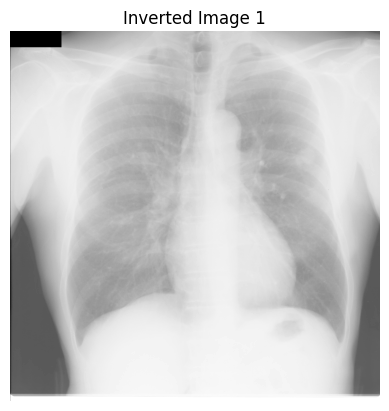

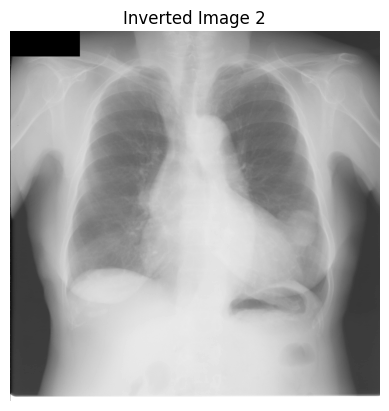

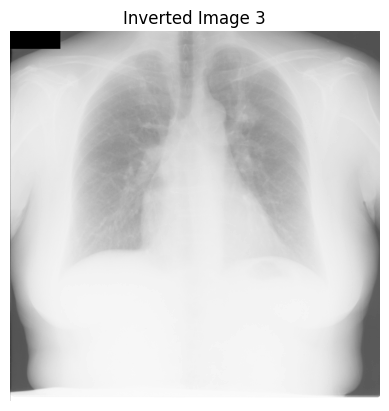

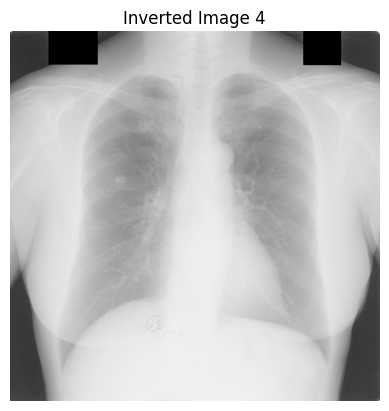

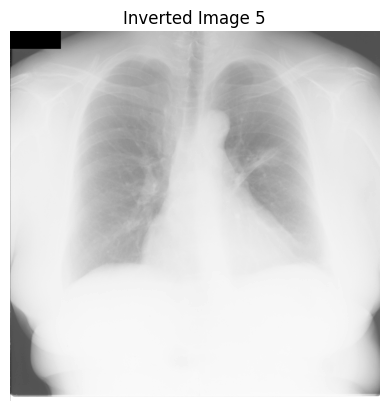

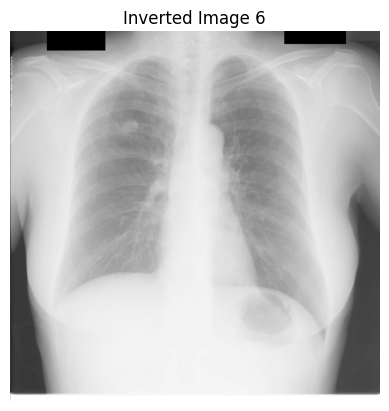

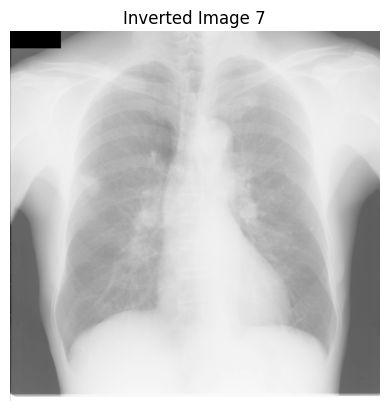

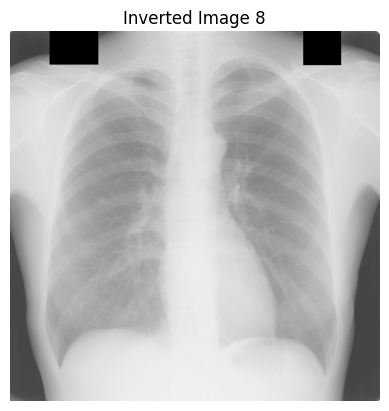

In [ ]:
import numpy as np
from skimage.util import invert
import matplotlib.pyplot as plt

# File pattern
file_pattern = '/kaggle/input/newdataset/Nodule154images/Nodule154images/JPCLN{:03d}.IMG'

# Process and invert all images from JPCNN001 to JPCNN015
for i in range(1, 16):
    # Construct the filename
    filename = file_pattern.format(i)

    # Load the raw image
    raw_image = np.fromfile(filename, dtype=">u2").reshape((2048, 2048)).astype('uint16')

    # Invert the image
    img = invert(raw_image)

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Inverted Image {i}')
    plt.axis('off')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load the raw image (replace with your actual file path)
file_path = '/kaggle/input/newdataset/Nodule154images/Nodule154images/JPCLN001.IMG'
raw_image = np.fromfile(file_path, dtype=">u2").reshape((2048, 2048)).astype('uint16')

# Apply histogram equalization
equalized_img = exposure.equalize_hist(raw_image)

# Plot the original and equalized images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(raw_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(equalized_img, cmap='gray')
axes[1].set_title('Histogram Equalized Image')
axes[1].axis('off')

plt.show()


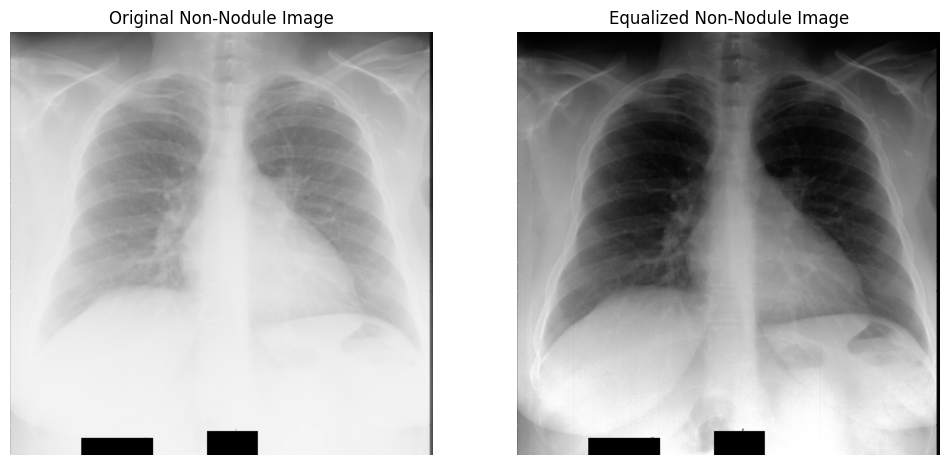

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.util import invert

# Base directory containing your images
base_path = '/kaggle/input/newdataset/'

# Define the directories for nodule and non-nodule images
nodule_dir = os.path.join(base_path, 'Nodule154images/Nodule154images')
non_nodule_dir = os.path.join(base_path, 'NonNodule93images/NonNodule93images')

# Output directories for saving equalized images
nodule_output_dir = '/kaggle/working/equalized_nodule_images/'
non_nodule_output_dir = '/kaggle/working/equalized_non_nodule_images/'

# Create output directories if they don't exist
os.makedirs(nodule_output_dir, exist_ok=True)
os.makedirs(non_nodule_output_dir, exist_ok=True)

# Process and equalize images in both directories
for folder, output_dir in [(nodule_dir, nodule_output_dir), (non_nodule_dir, non_nodule_output_dir)]:
    files = os.listdir(folder)
    
    for i, filename in enumerate(files, 1):
        # Construct the full path to the image file
        file_path = os.path.join(folder, filename)

        # Load the raw image
        raw_image = np.fromfile(file_path, dtype=">u2").reshape((2048, 2048)).astype('uint16')

        # Invert the image
        img = invert(raw_image)

        # Apply histogram equalization
        equalized_img = exposure.equalize_hist(img)

        # Save the equalized image
        output_filename = os.path.join(output_dir, f'equalized_{filename}.png')
        plt.imsave(output_filename, equalized_img, cmap='gray')

        # Display two example images (before and after equalization)
        if i == 1 and folder == nodule_dir:
            # Plot the original and equalized images side by side for the first nodule image
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            axes[0].imshow(img, cmap='gray')
            axes[0].set_title('Original Nodule Image')
            axes[0].axis('off')

            axes[1].imshow(equalized_img, cmap='gray')
            axes[1].set_title('Equalized Nodule Image')
            axes[1].axis('off')

            plt.show()

        if i == 1 and folder == non_nodule_dir:
            # Plot the original and equalized images side by side for the first non-nodule image
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            axes[0].imshow(img, cmap='gray')
            axes[0].set_title('Original Non-Nodule Image')
            axes[0].axis('off')

            axes[1].imshow(equalized_img, cmap='gray')
            axes[1].set_title('Equalized Non-Nodule Image')
            axes[1].axis('off')

            plt.show()


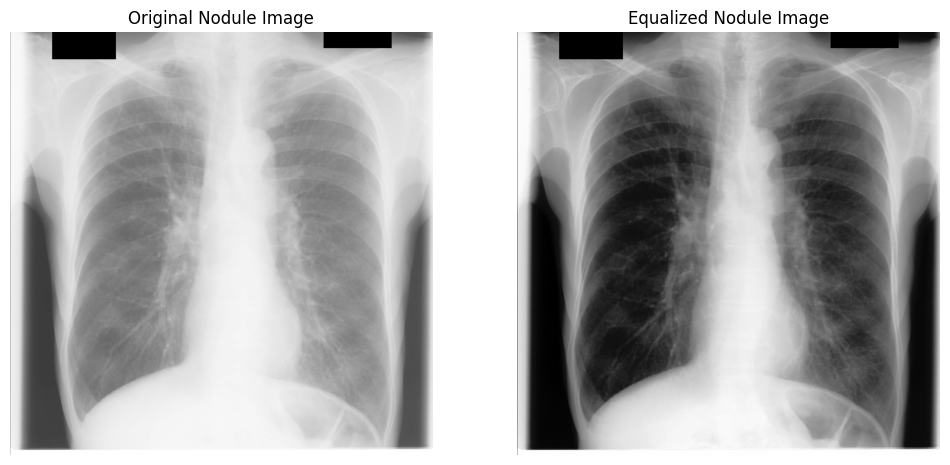

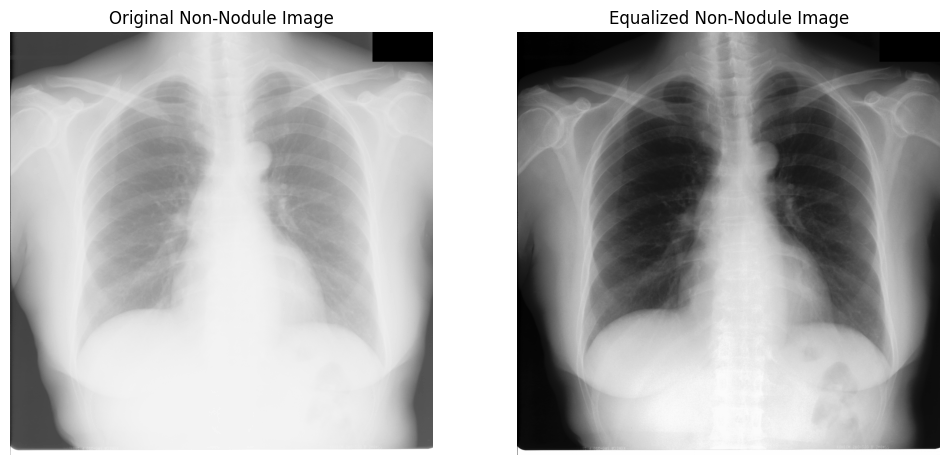

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import exposure
import random

# Define the paths to the original images and equalized images
nodule_dir = '/kaggle/input/newdataset/Nodule154images/Nodule154images'
non_nodule_dir = '/kaggle/input/newdataset/NonNodule93images/NonNodule93images'

nodule_equalized_dir = '/kaggle/working/equalized_nodule_images'
non_nodule_equalized_dir = '/kaggle/working/equalized_non_nodule_images'

# Select a random image from the nodule folder
random_nodule_image_name = random.choice(os.listdir(nodule_dir))
random_nodule_image_path = os.path.join(nodule_dir, random_nodule_image_name)
random_nodule_equalized_image_path = os.path.join(nodule_equalized_dir, f'equalized_{random_nodule_image_name}.png')

# Load and display the nodule image before and after equalization
raw_nodule_image = np.fromfile(random_nodule_image_path, dtype=">u2").reshape((2048, 2048)).astype('uint16')
equalized_nodule_image = plt.imread(random_nodule_equalized_image_path)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(invert(raw_nodule_image), cmap='gray')
axes[0].set_title('Original Nodule Image')
axes[0].axis('off')

axes[1].imshow(equalized_nodule_image, cmap='gray')
axes[1].set_title('Equalized Nodule Image')
axes[1].axis('off')

plt.show()

# Select a random image from the non-nodule folder
random_non_nodule_image_name = random.choice(os.listdir(non_nodule_dir))
random_non_nodule_image_path = os.path.join(non_nodule_dir, random_non_nodule_image_name)
random_non_nodule_equalized_image_path = os.path.join(non_nodule_equalized_dir, f'equalized_{random_non_nodule_image_name}.png')

# Load and display the non-nodule image before and after equalization
raw_non_nodule_image = np.fromfile(random_non_nodule_image_path, dtype=">u2").reshape((2048, 2048)).astype('uint16')
equalized_non_nodule_image = plt.imread(random_non_nodule_equalized_image_path)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(invert(raw_non_nodule_image), cmap='gray')
axes[0].set_title('Original Non-Nodule Image')
axes[0].axis('off')

axes[1].imshow(equalized_non_nodule_image, cmap='gray')
axes[1].set_title('Equalized Non-Nodule Image')
axes[1].axis('off')

plt.show()
